In [1]:
import numpy as np
import pickle
import pandas as pd
import joblib
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

In [2]:
def get_Xy_full(df):
    X = df.drop(columns=['TARGET'])
    y = df.TARGET
    return X, y

In [3]:
# load the model
model = joblib.load('model/best_LGB_10k_Undersampled_BestParams.pkl')

In [4]:
#load the X_train dataframe
df = pd.read_pickle('../data/cleaned/client_data_api_dashboard.pkl')
#df = pd.read_pickle('../data/cleaned/client_data_api_dashboard_1k.pkl')

full_data = pd.read_csv('../data/raw/application_train.csv')


<AxesSubplot:>

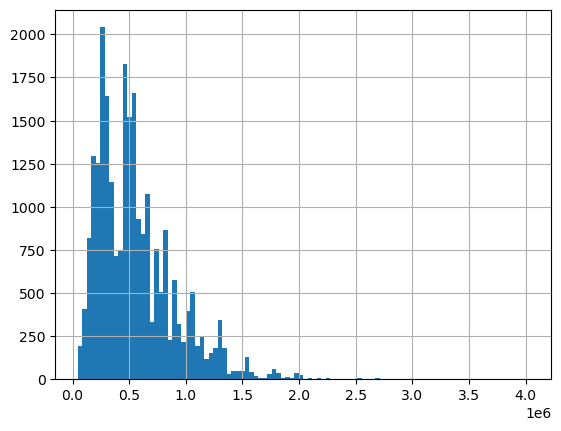

In [5]:
full_data[full_data.TARGET==1]['AMT_CREDIT'].hist(bins=100)

In [6]:
df

,PA_PrLCash_SK_DPD_DEF__mean__mean,PA_DAYS_FIRST_DUE__min,PA_DAYS_LAST_DUE_1ST_VERSION__min,PA_PrLI_DELAY_DAYS_INSTALMENT__max__max,OBS_60_CNT_SOCIAL_CIRCLE,Bur_CB_DAYS_CREDIT_ENDDATE__max,DAYS_EMPLOYED_PERC,Bur_CB_AMT_CREDIT_SUM_DEBT__sum,PA_DAYS_FIRST_DUE__max,Bur_CB_AMT_CREDIT_SUM__mean,...,ORGANIZATION_TYPE_Tradetype5,ORGANIZATION_TYPE_Tradetype6,ORGANIZATION_TYPE_Tradetype7,ORGANIZATION_TYPE_Transporttype1,ORGANIZATION_TYPE_Transporttype2,ORGANIZATION_TYPE_Transporttype3,ORGANIZATION_TYPE_Transporttype4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.000000,-565.0,125.0,-12.0,2.0,780.0,0.067329,245781.00,-565.0,108131.945625,...,0,0,0,0,0,0,0,0,0,1
100003,0.000000,-2310.0,-1980.0,-1.0,1.0,1216.0,0.070862,0.00,-716.0,254350.125000,...,0,0,0,0,0,0,0,0,0,0
100004,0.000000,-784.0,-694.0,-3.0,0.0,-382.0,0.011814,0.00,-784.0,94518.900000,...,0,0,0,0,0,0,0,0,0,0
100006,0.000000,-545.0,-215.0,-1.0,2.0,0.0,0.159905,0.00,365243.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
100007,0.000000,-2326.0,-2056.0,12.0,0.0,-783.0,0.152418,0.00,-344.0,146250.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0.000000,-210.0,0.0,-8.0,0.0,0.0,0.025303,0.00,-210.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
456252,0.000000,-2466.0,-2316.0,3.0,0.0,0.0,-17.580890,0.00,-2466.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
456253,0.416667,-2812.0,-2722.0,9.0,6.0,1113.0,0.529266,1795833.00,-1866.0,990000.000000,...,0,0,0,0,0,0,0,0,0,0


In [7]:
full_data = full_data.set_index('SK_ID_CURR')
full_data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [8]:
X, y = get_Xy_full(df)

In [9]:
X.shape, y.shape

((307511, 164), (307511,))

In [10]:
y_pred_probas = model.predict_proba(X)
y_pred = model.predict(X)

In [11]:
y_prob_default = y_pred_probas[:,1]

In [12]:
df_predictions = df[['TARGET']].copy(deep=True)
df_predictions['PREDICTION'] = y_pred
df_predictions['PROB_DEFAULT'] = y_prob_default
df_predictions

,TARGET,PREDICTION,PROB_DEFAULT
SK_ID_CURR,,,
100002,1,1,0.845645
100003,0,0,0.175487
100004,0,0,0.283380
100006,0,0,0.263360
100007,0,1,0.515676
...,...,...,...
456251,0,0,0.384683
456252,0,1,0.586088
456253,0,1,0.506885


In [13]:
# from full data take AMT_CREDIT,AMT_ANNUITY

full_data = full_data[['AMT_CREDIT','AMT_ANNUITY']].copy(deep=True)
full_data
# from df take TARGET,PREDICTION,PROB_DEFAULT

# joi the two together
df_predictions = df_predictions.join(full_data, how='left')

In [14]:
df_predictions

,TARGET,PREDICTION,PROB_DEFAULT,AMT_CREDIT,AMT_ANNUITY
SK_ID_CURR,,,,,
100002,1,1,0.845645,406597.5,24700.5
100003,0,0,0.175487,1293502.5,35698.5
100004,0,0,0.283380,135000.0,6750.0
100006,0,0,0.263360,312682.5,29686.5
100007,0,1,0.515676,513000.0,21865.5
...,...,...,...,...,...
456251,0,0,0.384683,254700.0,27558.0
456252,0,1,0.586088,269550.0,12001.5
456253,0,1,0.506885,677664.0,29979.0


In [15]:
df_predictions.isna().sum()

TARGET           0
PREDICTION       0
PROB_DEFAULT     0
AMT_CREDIT       0
AMT_ANNUITY     12
dtype: int64

In [16]:
df_predictions = df_predictions.dropna()

In [17]:
df_predictions.shape

(307499, 5)

<AxesSubplot:>

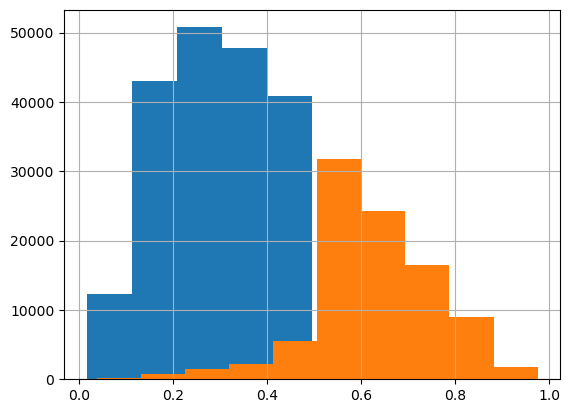

In [18]:
df_predictions[df_predictions.TARGET==df_predictions.PREDICTION]['PROB_DEFAULT'].hist()
df_predictions[df_predictions.TARGET!=df_predictions.PREDICTION]['PROB_DEFAULT'].hist()

In [19]:
# predicted safe, was safe
pred_safe_was_safe = df_predictions[(df_predictions.TARGET==0) & (df_predictions.PREDICTION==0)].shape[0]

# predicted risk, was risk
pred_risk_was_risk = df_predictions[(df_predictions.TARGET==1) & (df_predictions.PREDICTION==1)].shape[0]

# predicted safe, was risk
pred_safe_was_risk = df_predictions[(df_predictions.TARGET==1) & (df_predictions.PREDICTION==0)].shape[0]

# predicted risk, was safe
pred_risk_was_safe = df_predictions[(df_predictions.TARGET==0) & (df_predictions.PREDICTION==1)].shape[0]

# total clients
total_clients = df.shape[0]

print ('total_clients',total_clients)
print ('pred_safe_was_safe',pred_safe_was_safe,pred_safe_was_safe/total_clients)
print ('pred_risk_was_risk',pred_risk_was_risk,pred_risk_was_risk/total_clients)
print ('pred_safe_was_risk',pred_safe_was_risk,pred_safe_was_risk/total_clients)
print ('pred_risk_was_safe',pred_risk_was_safe,pred_risk_was_safe/total_clients)



total_clients 307511
pred_safe_was_safe 196698 0.6396454110584662
pred_risk_was_risk 17314 0.05630367694163786
pred_safe_was_risk 7511 0.024425142515227097
pred_risk_was_safe 85976 0.27958674649036946


c:\Users\adam_\anaconda3\envs\OCP7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\adam_\anaconda3\envs\OCP7\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='PROB_DEFAULT'>

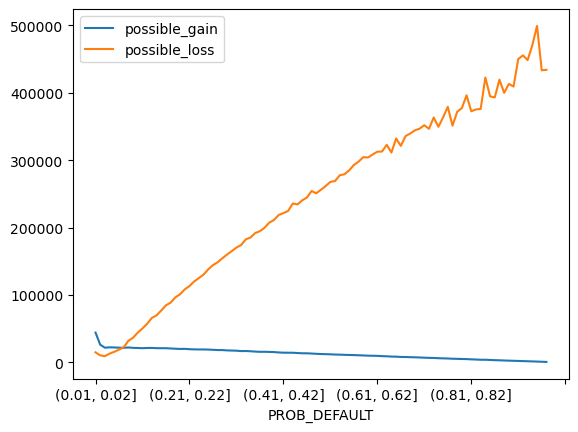

In [20]:
flt_perc_risk_loss = 0.05
flt_perc_risk_loss = 1

# POSSIBLE GAIN is interest amount (AMT_ANNUITY) * probability of gain (prob 0)
df_predictions['possible_gain'] = (df_predictions.AMT_ANNUITY * (1-df_predictions.PROB_DEFAULT))

# POSSIBLE LOSS is loan amount (AMT_CREDIT) * probability of loass (prob 1)
df_predictions['possible_loss'] = (df_predictions.AMT_CREDIT * (df_predictions.PROB_DEFAULT)) * flt_perc_risk_loss

# CUT BY each 1%, group means
df_final = df_predictions.groupby(pd.cut(df_predictions["PROB_DEFAULT"], np.arange(0, 1.01, 0.01))).median().copy(deep=True)


#df_final = df_final[df_final.TARGET==df_final.PREDICTION]

# get rid of any NaN
df_final = df_final.dropna(axis=0)

# cut df down to gains and losses
df_final = df_final[['possible_gain','possible_loss']]

# linechart
df_final.plot()

In [22]:
for index,row in df_final.iterrows():
    if row['possible_gain'] <= row['possible_loss']:
        print (index)
        break


(0.07, 0.08]
